# Domain: Electronics and Telecommunication

## Data Description:
### Parameters: Various measurable signal parameters
### Signal Quality: Final signal strength or quality

#### Data import and understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Input

In [2]:
data = pd.read_csv("Signal.csv")

In [3]:
data.shape

(1599, 12)

In [4]:
data.head(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

There is no missing values in the dataset

In [6]:
data.duplicated(keep=False)

0        True
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [7]:
data = data.drop_duplicates(keep='first')

In [8]:
data.shape

(1359, 12)

(array([ 10.,   0.,  53.,   0., 577.,   0., 535.,   0., 167.,  17.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

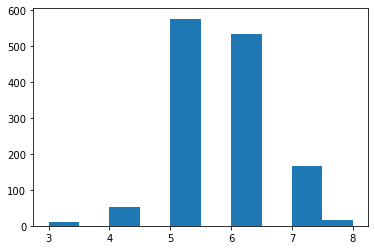

In [9]:
plt.hist(data['Signal_Strength'])

In [10]:
data['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

The above distribution is normal distribution in which 5 and 6 are the most signal strengths

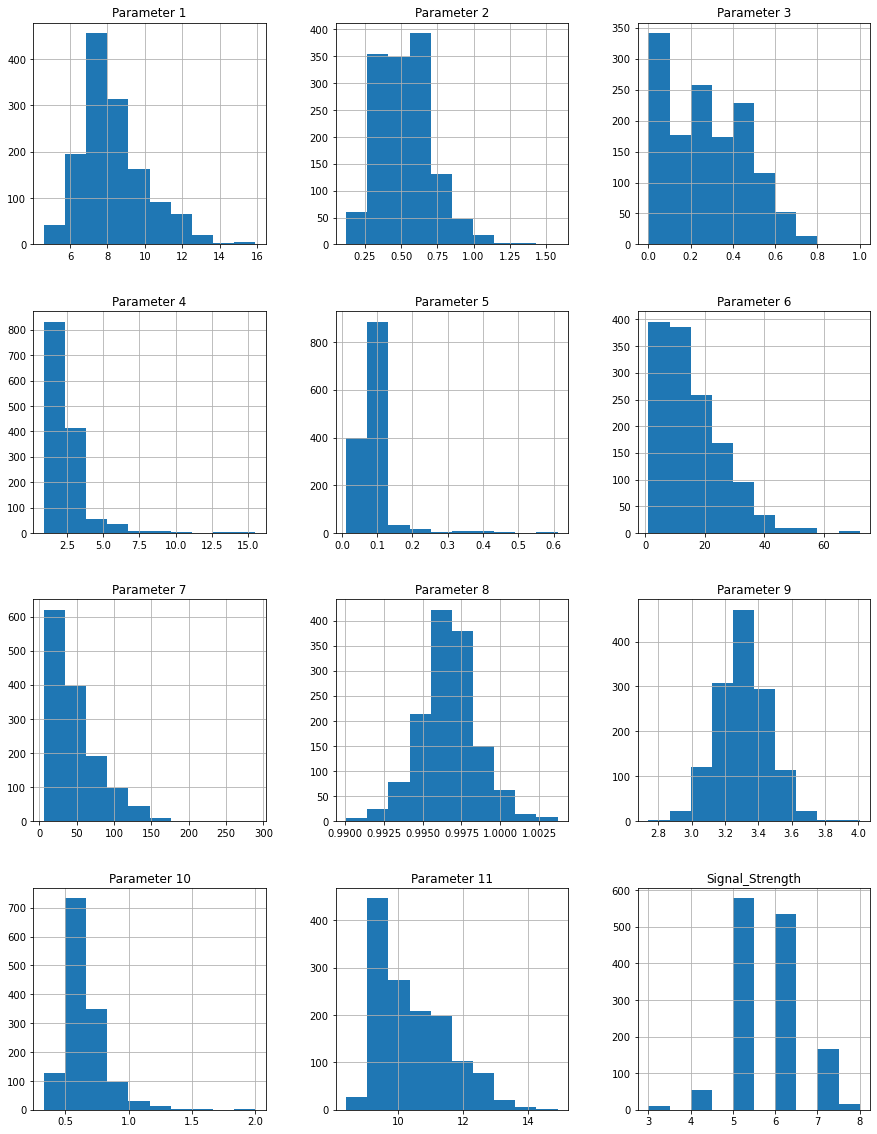

In [11]:
data.hist(figsize = (15,20))
plt.show()

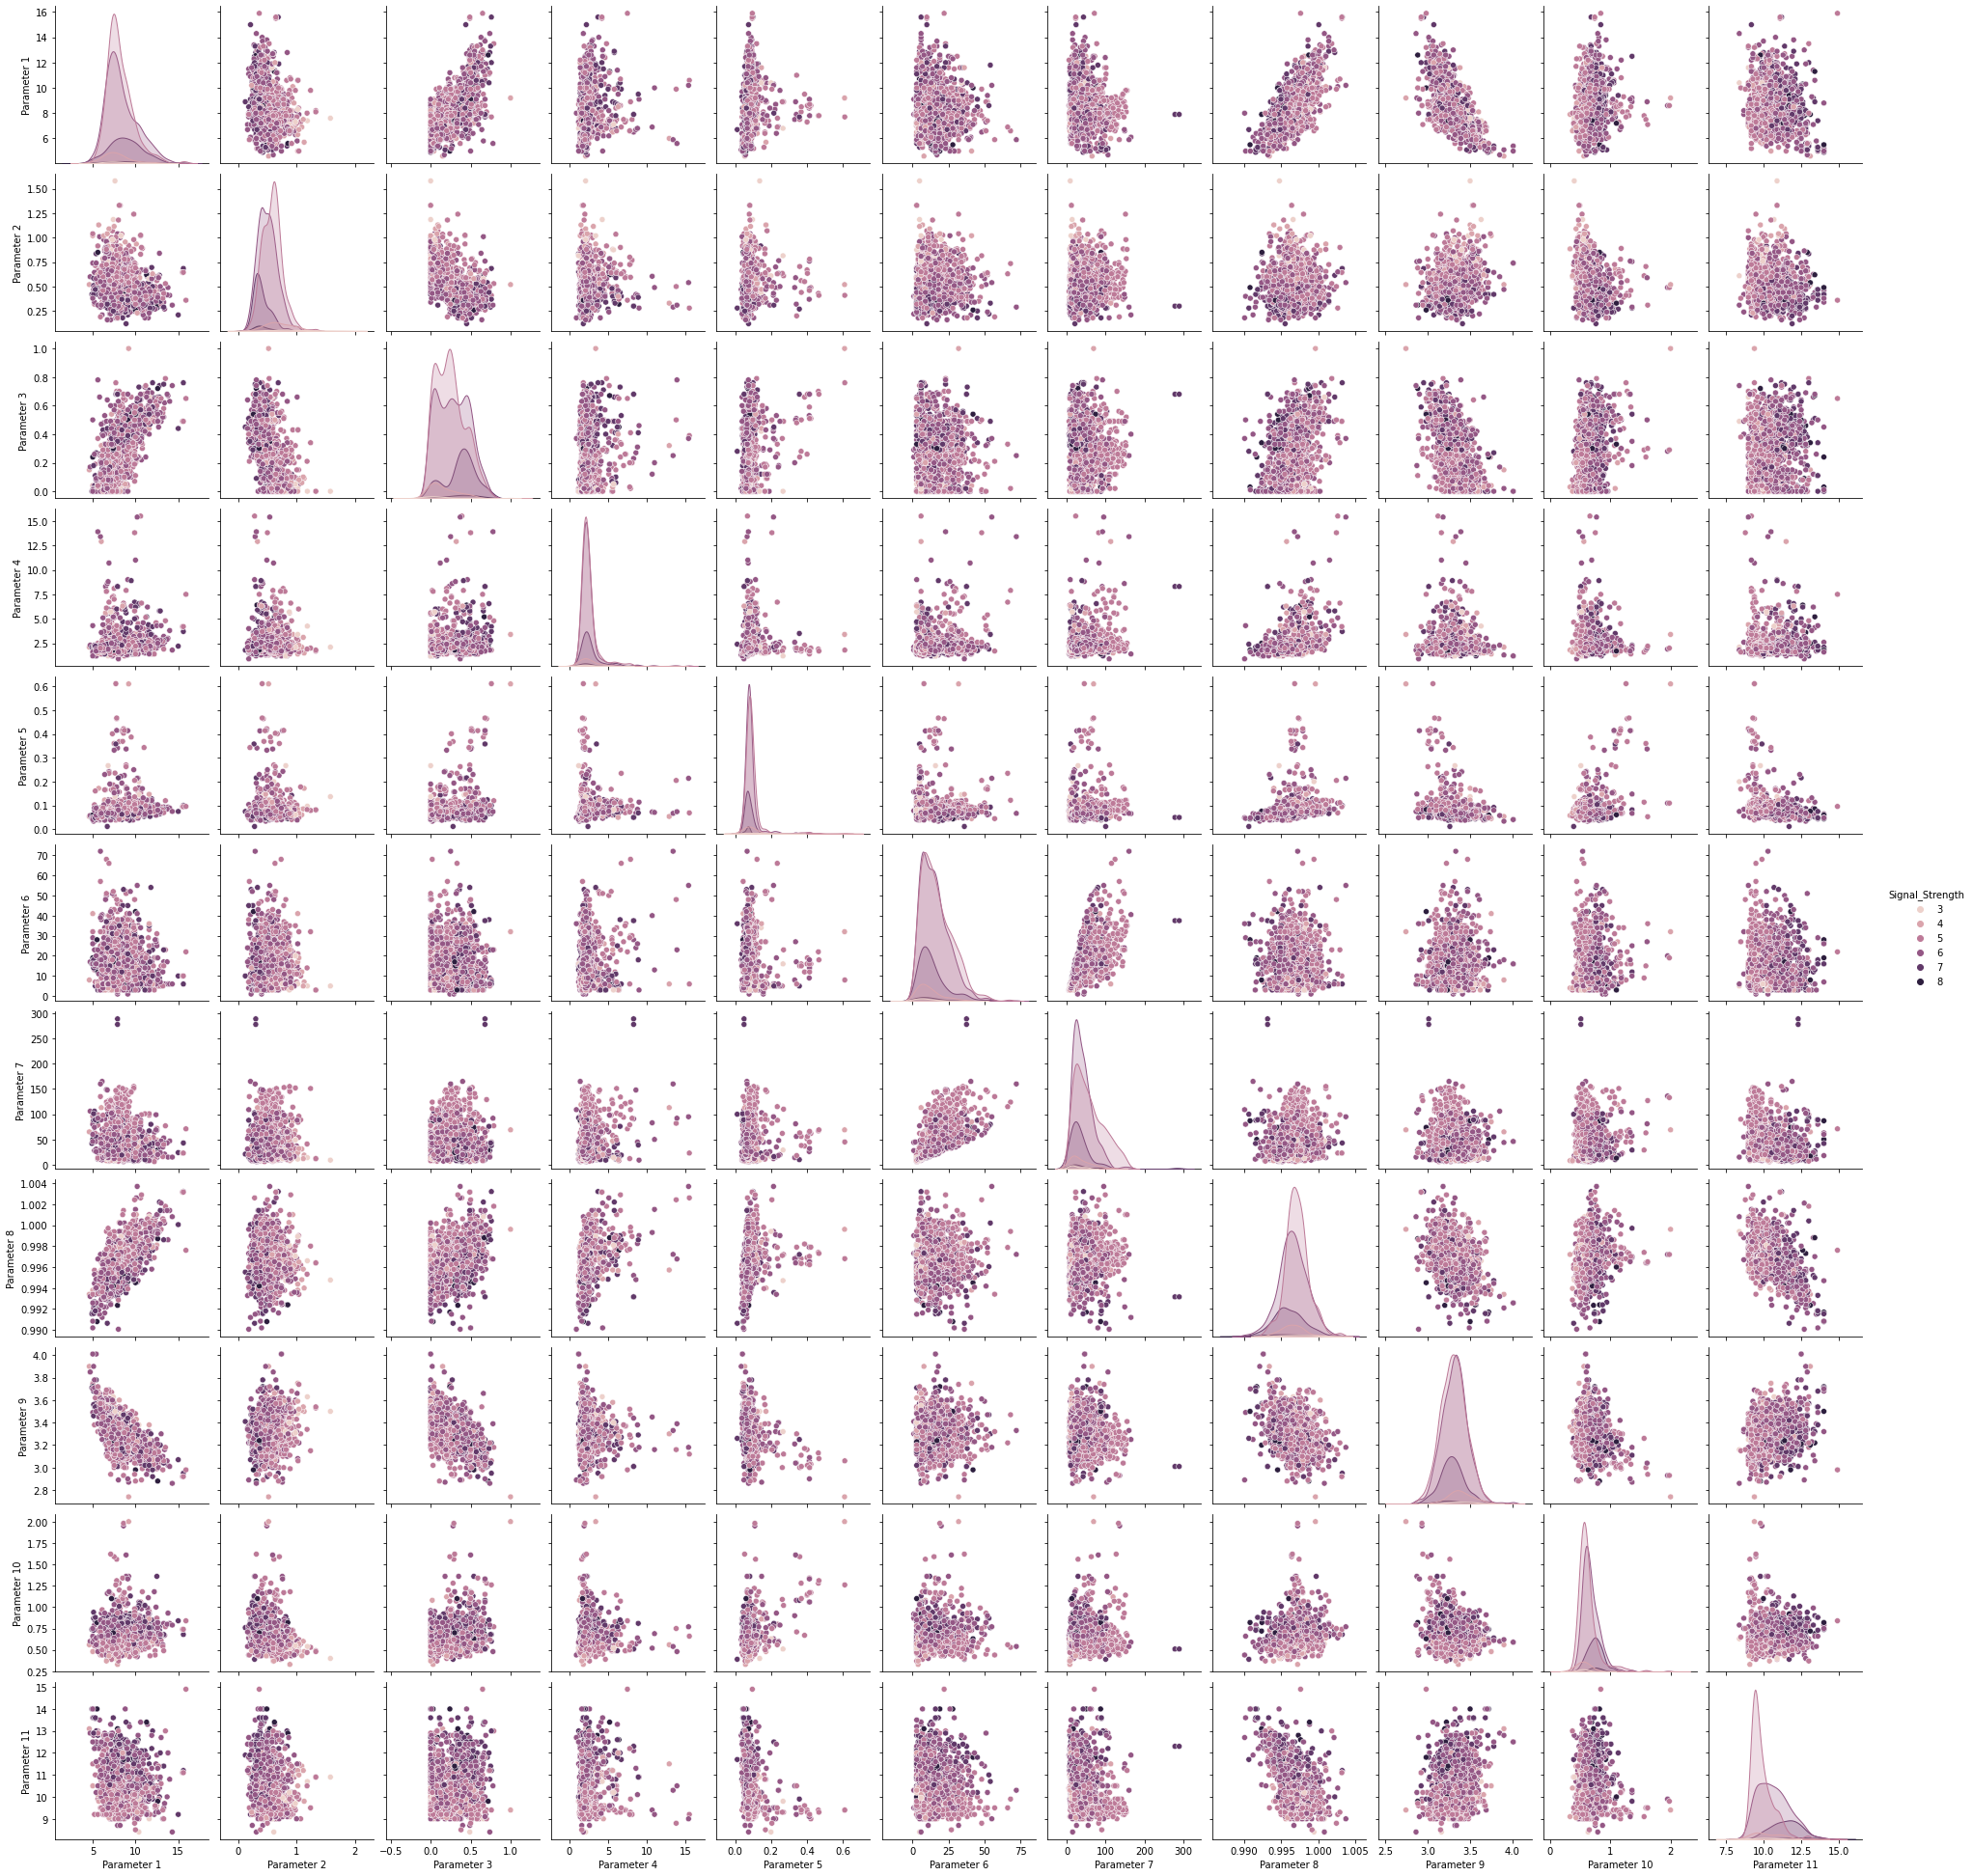

In [12]:
sns.pairplot(data, diag_kind='kde', hue='Signal_Strength')

<AxesSubplot:>

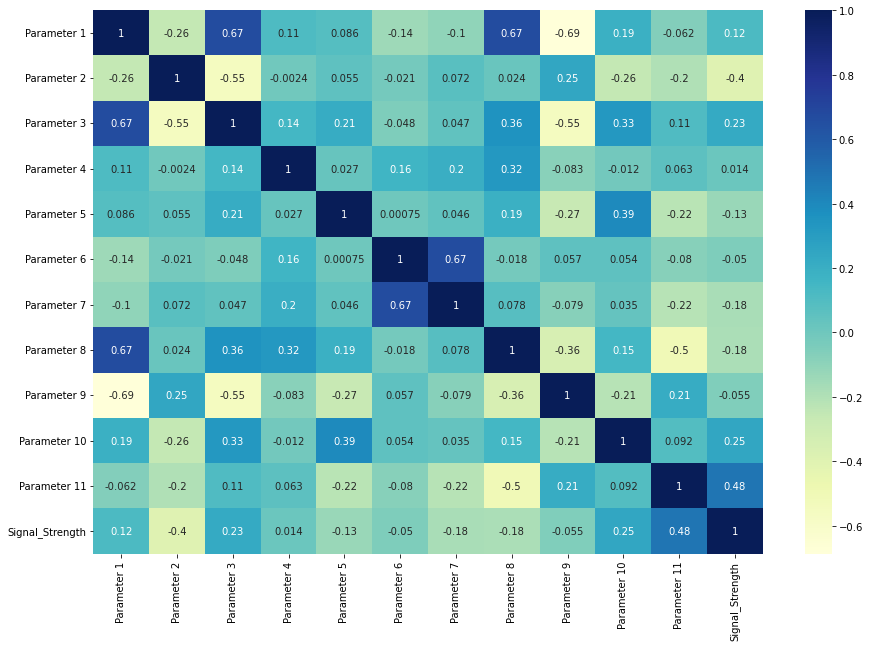

In [13]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

From the above pair plot and heat map , the dataset has no collinear variables i.e no two attributes are linear. 
No Multicollinearity involved

### Data preprocessing

In [14]:
X = data.drop(['Signal_Strength'],axis=1)

In [15]:
y = data[['Signal_Strength']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [17]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (951, 11)
X_test.shape: (408, 11)
y_train.shape: (951, 1)
y_test.shape: (408, 1)


In [18]:
std = StandardScaler()
col_names = X_train.columns

In [19]:
X_train_scaled = pd.DataFrame(std.fit_transform(X_train), columns= col_names)
X_test_scaled = pd.DataFrame(std.fit_transform(X_test), columns= col_names)

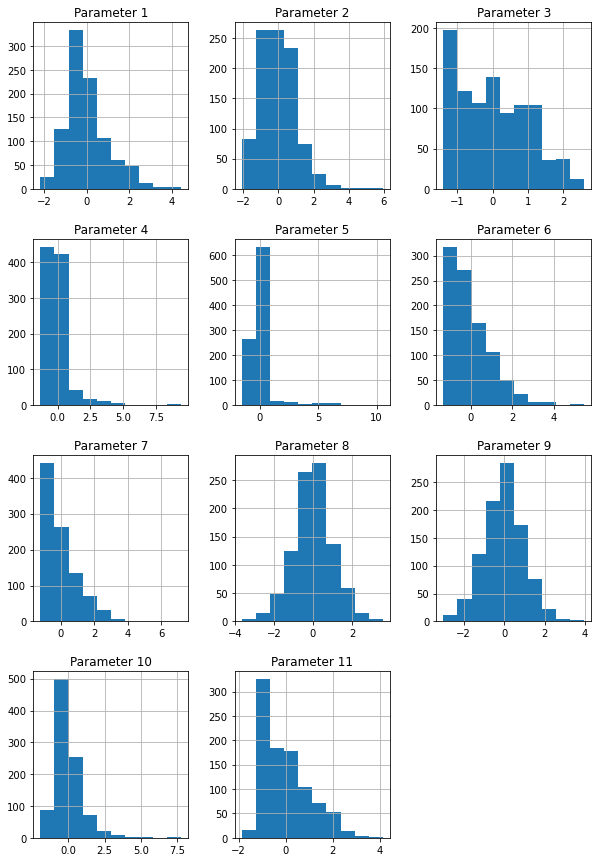

In [20]:
X_train_scaled.hist(figsize = (10,15))
plt.show()

From the above histograms, it is shown that the parameters were reduced to standard normal distribution with mean 0

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_teat: {y_test.shape}')

Shape of y_train: (951, 9)
Shape of y_teat: (408, 9)


### Model training and evaluation using neural networks

### Model with no hidden layers

In [22]:
model = Sequential()
model.add(InputLayer(input_shape=X_train_scaled.shape[1]))
model.add(Dense(9,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=15, verbose=2)

Epoch 1/100
64/64 - 1s - loss: 2.5570 - accuracy: 0.1588 - val_loss: 2.3506 - val_accuracy: 0.2010 - 1s/epoch - 22ms/step
Epoch 2/100
64/64 - 0s - loss: 2.3581 - accuracy: 0.1882 - val_loss: 2.1711 - val_accuracy: 0.2377 - 275ms/epoch - 4ms/step
Epoch 3/100
64/64 - 0s - loss: 2.1867 - accuracy: 0.2524 - val_loss: 2.0138 - val_accuracy: 0.3137 - 222ms/epoch - 3ms/step
Epoch 4/100
64/64 - 0s - loss: 2.0376 - accuracy: 0.3270 - val_loss: 1.8798 - val_accuracy: 0.4020 - 238ms/epoch - 4ms/step
Epoch 5/100
64/64 - 0s - loss: 1.9101 - accuracy: 0.4017 - val_loss: 1.7642 - val_accuracy: 0.4608 - 202ms/epoch - 3ms/step
Epoch 6/100
64/64 - 0s - loss: 1.8010 - accuracy: 0.4343 - val_loss: 1.6672 - val_accuracy: 0.5098 - 208ms/epoch - 3ms/step
Epoch 7/100
64/64 - 0s - loss: 1.7091 - accuracy: 0.4606 - val_loss: 1.5844 - val_accuracy: 0.5441 - 219ms/epoch - 3ms/step
Epoch 8/100
64/64 - 0s - loss: 1.6316 - accuracy: 0.4911 - val_loss: 1.5152 - val_accuracy: 0.5637 - 233ms/epoch - 4ms/step
Epoch 9/10

Epoch 67/100
64/64 - 0s - loss: 0.9840 - accuracy: 0.5836 - val_loss: 0.9588 - val_accuracy: 0.6005 - 231ms/epoch - 4ms/step
Epoch 68/100
64/64 - 0s - loss: 0.9828 - accuracy: 0.5846 - val_loss: 0.9584 - val_accuracy: 0.6029 - 256ms/epoch - 4ms/step
Epoch 69/100
64/64 - 0s - loss: 0.9821 - accuracy: 0.5825 - val_loss: 0.9576 - val_accuracy: 0.6029 - 260ms/epoch - 4ms/step
Epoch 70/100
64/64 - 0s - loss: 0.9808 - accuracy: 0.5825 - val_loss: 0.9570 - val_accuracy: 0.6078 - 237ms/epoch - 4ms/step
Epoch 71/100
64/64 - 0s - loss: 0.9800 - accuracy: 0.5804 - val_loss: 0.9568 - val_accuracy: 0.6005 - 240ms/epoch - 4ms/step
Epoch 72/100
64/64 - 0s - loss: 0.9796 - accuracy: 0.5836 - val_loss: 0.9553 - val_accuracy: 0.6054 - 245ms/epoch - 4ms/step
Epoch 73/100
64/64 - 0s - loss: 0.9781 - accuracy: 0.5836 - val_loss: 0.9554 - val_accuracy: 0.6078 - 232ms/epoch - 4ms/step
Epoch 74/100
64/64 - 0s - loss: 0.9771 - accuracy: 0.5846 - val_loss: 0.9541 - val_accuracy: 0.6029 - 237ms/epoch - 4ms/step


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 108       
                                                                 
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Loss Curves')

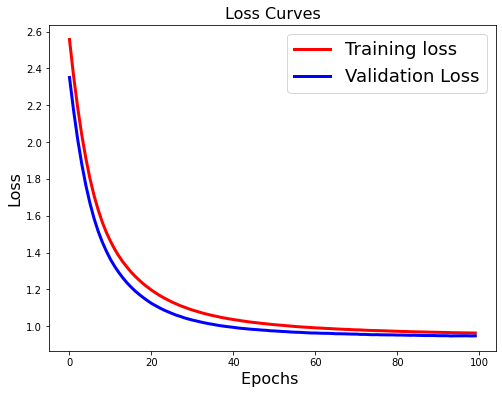

In [26]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy curves')

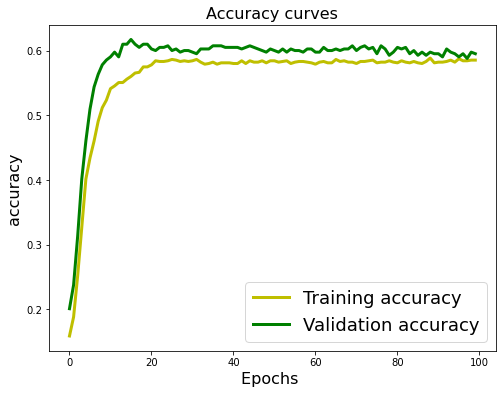

In [27]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'y',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'g',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy curves',fontsize=16)

### Model with 3 hidden layers

In [28]:
model2 = Sequential()
model2.add(InputLayer(input_shape=X_train_scaled.shape[1]))
model2.add(layers.BatchNormalization())
model2.add(Dense(22, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(9, activation='softmax'))

In [29]:
model2.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [30]:
history_2 = model2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=15, verbose=2)

Epoch 1/100
64/64 - 2s - loss: 1.9107 - accuracy: 0.4059 - val_loss: 1.6244 - val_accuracy: 0.4853 - 2s/epoch - 25ms/step
Epoch 2/100
64/64 - 0s - loss: 1.3534 - accuracy: 0.4606 - val_loss: 1.2270 - val_accuracy: 0.4902 - 249ms/epoch - 4ms/step
Epoch 3/100
64/64 - 0s - loss: 1.1595 - accuracy: 0.5289 - val_loss: 1.1144 - val_accuracy: 0.5613 - 249ms/epoch - 4ms/step
Epoch 4/100
64/64 - 0s - loss: 1.0956 - accuracy: 0.5426 - val_loss: 1.0575 - val_accuracy: 0.6201 - 227ms/epoch - 4ms/step
Epoch 5/100
64/64 - 0s - loss: 1.0647 - accuracy: 0.5542 - val_loss: 1.0290 - val_accuracy: 0.6054 - 237ms/epoch - 4ms/step
Epoch 6/100
64/64 - 0s - loss: 1.0482 - accuracy: 0.5773 - val_loss: 1.0081 - val_accuracy: 0.6275 - 220ms/epoch - 3ms/step
Epoch 7/100
64/64 - 0s - loss: 1.0403 - accuracy: 0.5615 - val_loss: 1.0004 - val_accuracy: 0.6103 - 228ms/epoch - 4ms/step
Epoch 8/100
64/64 - 0s - loss: 1.0165 - accuracy: 0.5699 - val_loss: 0.9904 - val_accuracy: 0.6127 - 207ms/epoch - 3ms/step
Epoch 9/10

Epoch 67/100
64/64 - 0s - loss: 0.9314 - accuracy: 0.6004 - val_loss: 0.9608 - val_accuracy: 0.5980 - 233ms/epoch - 4ms/step
Epoch 68/100
64/64 - 0s - loss: 0.9145 - accuracy: 0.6057 - val_loss: 0.9534 - val_accuracy: 0.6250 - 243ms/epoch - 4ms/step
Epoch 69/100
64/64 - 0s - loss: 0.9179 - accuracy: 0.6036 - val_loss: 0.9524 - val_accuracy: 0.6152 - 242ms/epoch - 4ms/step
Epoch 70/100
64/64 - 0s - loss: 0.9021 - accuracy: 0.6036 - val_loss: 0.9511 - val_accuracy: 0.6103 - 205ms/epoch - 3ms/step
Epoch 71/100
64/64 - 0s - loss: 0.8979 - accuracy: 0.6130 - val_loss: 0.9547 - val_accuracy: 0.6029 - 228ms/epoch - 4ms/step
Epoch 72/100
64/64 - 0s - loss: 0.9095 - accuracy: 0.6078 - val_loss: 0.9540 - val_accuracy: 0.6176 - 231ms/epoch - 4ms/step
Epoch 73/100
64/64 - 0s - loss: 0.9050 - accuracy: 0.6141 - val_loss: 0.9523 - val_accuracy: 0.6078 - 227ms/epoch - 4ms/step
Epoch 74/100
64/64 - 0s - loss: 0.8913 - accuracy: 0.6225 - val_loss: 0.9535 - val_accuracy: 0.6078 - 218ms/epoch - 3ms/step


In [31]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 22)                264       
                                                                 
 dense_2 (Dense)             (None, 10)                230       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 9)                 99        
                                                                 
Total params: 747
Trainable params: 725
Non-trainable params: 22
_______________________________________________________

Text(0.5, 1.0, 'Loss Curves')

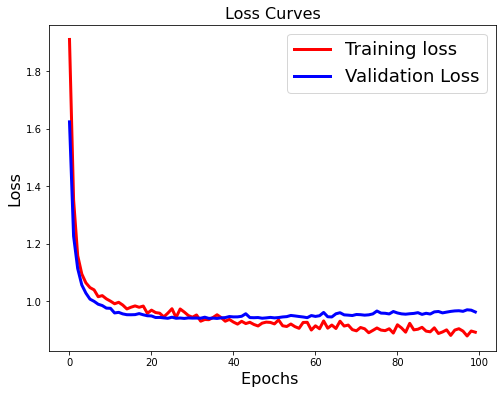

In [32]:
plt.figure(figsize=[8,6])
plt.plot(history_2.history['loss'],'r',linewidth=3.0)
plt.plot(history_2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy curves')

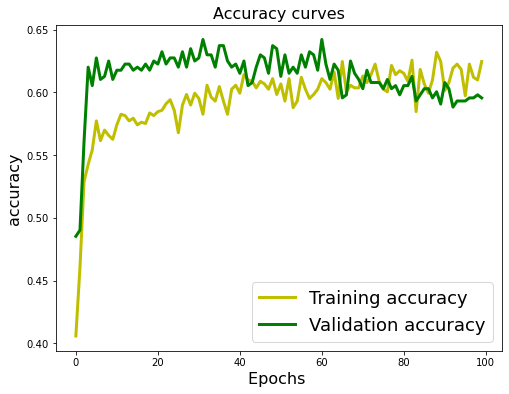

In [33]:
plt.figure(figsize=[8,6])
plt.plot(history_2.history['accuracy'],'y',linewidth=3.0)
plt.plot(history_2.history['val_accuracy'],'g',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy curves',fontsize=16)

Result:  From the above models, model with more hidden layers performed better than model with no hidden layers. For accuracy refer graph

# Autonomous vehicles

### PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

### 1.	Data Import and Exploration 

In [34]:
import h5py

In [35]:
f = h5py.File("D:\\deep_learning\\Autonomous_Vehicles_SVHN_single_grey1.h5")

In [36]:
f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [37]:
X_train = f['X_train'][:]
y_train = f['y_train'][:]
X_test = f['X_test'][:]
y_test = f['y_test'][:]

In [38]:
type(y_train)

numpy.ndarray

### 2.Data Visualisation and preprocessing 

In [39]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


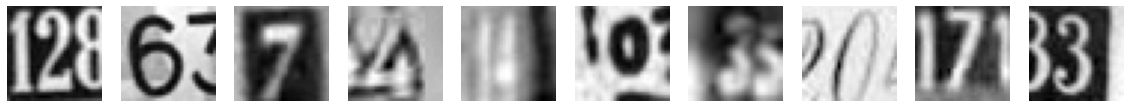

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [40]:
plt.figure(figsize=(20, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print(f'label for each of the above image: {y_train[0:10]}')

#### Reshaping X_train and X_test can be done directly in model building using Flatten 

In [41]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [42]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [43]:
X_train[0]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

In [44]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
y_train.shape

(42000, 10)

In [46]:
y_test.shape

(18000, 10)

In [47]:
num_classes = y_test.shape[1]
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


### 3.Model Training & Evaluation using Neural Network 

In [61]:
model = Sequential()  
model.add(Flatten(input_shape=(32,32)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [62]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [63]:
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 3s - loss: 2.3029 - accuracy: 0.1113 - val_loss: 2.2740 - val_accuracy: 0.1435 - 3s/epoch - 20ms/step
Epoch 2/100
140/140 - 2s - loss: 2.0020 - accuracy: 0.2840 - val_loss: 1.7556 - val_accuracy: 0.3781 - 2s/epoch - 11ms/step
Epoch 3/100
140/140 - 2s - loss: 1.6323 - accuracy: 0.4417 - val_loss: 1.5083 - val_accuracy: 0.4952 - 2s/epoch - 12ms/step
Epoch 4/100
140/140 - 2s - loss: 1.4515 - accuracy: 0.5176 - val_loss: 1.3312 - val_accuracy: 0.5631 - 2s/epoch - 12ms/step
Epoch 5/100
140/140 - 2s - loss: 1.3170 - accuracy: 0.5706 - val_loss: 1.2496 - val_accuracy: 0.5954 - 2s/epoch - 11ms/step
Epoch 6/100
140/140 - 2s - loss: 1.2269 - accuracy: 0.6053 - val_loss: 1.1739 - val_accuracy: 0.6258 - 2s/epoch - 11ms/step
Epoch 7/100
140/140 - 2s - loss: 1.1616 - accuracy: 0.6338 - val_loss: 1.1436 - val_accuracy: 0.6399 - 2s/epoch - 11ms/step
Epoch 8/100
140/140 - 2s - loss: 1.1220 - accuracy: 0.6468 - val_loss: 1.0845 - val_accuracy: 0.6632 - 2s/epoch - 11ms/step
Epoch 9/

Epoch 67/100
140/140 - 2s - loss: 0.5132 - accuracy: 0.8413 - val_loss: 0.6917 - val_accuracy: 0.7992 - 2s/epoch - 11ms/step
Epoch 68/100
140/140 - 2s - loss: 0.5103 - accuracy: 0.8419 - val_loss: 0.7136 - val_accuracy: 0.7947 - 2s/epoch - 11ms/step
Epoch 69/100
140/140 - 2s - loss: 0.5094 - accuracy: 0.8420 - val_loss: 0.6614 - val_accuracy: 0.8113 - 2s/epoch - 11ms/step
Epoch 70/100
140/140 - 2s - loss: 0.4923 - accuracy: 0.8466 - val_loss: 0.6647 - val_accuracy: 0.8136 - 2s/epoch - 11ms/step
Epoch 71/100
140/140 - 2s - loss: 0.4927 - accuracy: 0.8477 - val_loss: 0.6712 - val_accuracy: 0.8102 - 2s/epoch - 12ms/step
Epoch 72/100
140/140 - 2s - loss: 0.4925 - accuracy: 0.8466 - val_loss: 0.6749 - val_accuracy: 0.8080 - 2s/epoch - 11ms/step
Epoch 73/100
140/140 - 2s - loss: 0.4802 - accuracy: 0.8506 - val_loss: 0.6871 - val_accuracy: 0.8024 - 2s/epoch - 12ms/step
Epoch 74/100
140/140 - 2s - loss: 0.4926 - accuracy: 0.8460 - val_loss: 0.6756 - val_accuracy: 0.8089 - 2s/epoch - 11ms/step


In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               262400    
                                                                 
 dense_19 (Dense)            (None, 64)                16448     
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 285,418
Trainable params: 285,418
Non-tr

In [65]:
y_pred = model.predict(X_test)

563/563 [==============================] - 1s 2ms/step


In [66]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.6883 - accuracy: 0.8118


[0.6882701516151428, 0.8118333220481873]

In [67]:
y_pred[0]

array([0.6103146 , 0.08210085, 0.00570958, 0.00826331, 0.00670918,
       0.01669748, 0.13589214, 0.0104625 , 0.10379928, 0.02005116],
      dtype=float32)

In [68]:
y_pred_final=[np.argmax(i) for i in y_pred ]
y_test = [np.argmax(i) for i in y_test]

In [69]:
y_pred_final[0]

0

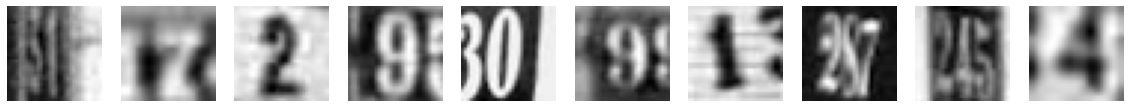

label for each of the above image given: [1, 7, 2, 9, 0, 9, 1, 8, 4, 4]
label for each of the above image predicted: [0, 7, 2, 9, 0, 9, 1, 5, 1, 4]


In [70]:
plt.figure(figsize=(20, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')
plt.show()
print(f'label for each of the above image given: {y_test[0:10]}')
print(f'label for each of the above image predicted: {y_pred_final[0:10]}')

Text(0.5, 1.0, 'Confusion matrix')

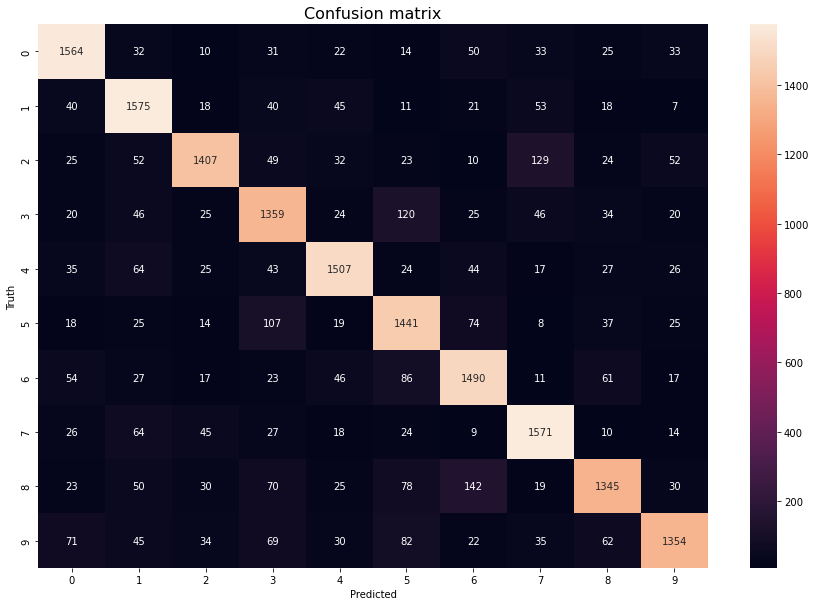

In [72]:
cm = tf.math.confusion_matrix( labels= y_test,predictions=y_pred_final)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True,fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

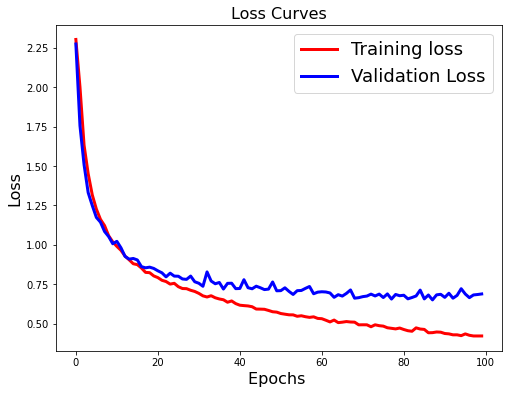

In [73]:
plt.figure(figsize=[8,6])
plt.plot(training_history.history['loss'],'r',linewidth=3.0)
plt.plot(training_history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

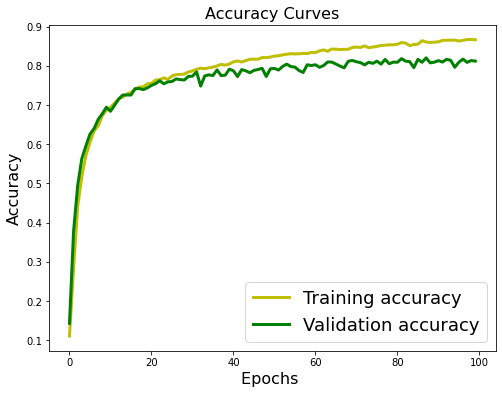

In [74]:
plt.figure(figsize=[8,6])
plt.plot(training_history.history['accuracy'],'y',linewidth=3.0)
plt.plot(training_history.history['val_accuracy'],'g',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Result:  The above has 81% accuracy on test set with minimum loss of 0.68 . The wrongly predicted values are shown in confusion matrix.